In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/Telco-Customer-Churn.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### 1. Exploratory data analysis

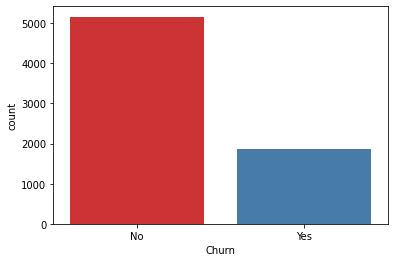

In [5]:
sns.countplot(data=df, x='Churn', palette='Set1');

#### Tenure

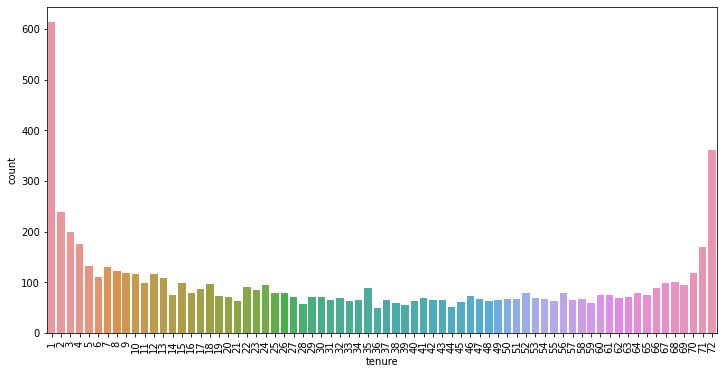

In [6]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='tenure')

plt.xticks(rotation=90)
plt.show()

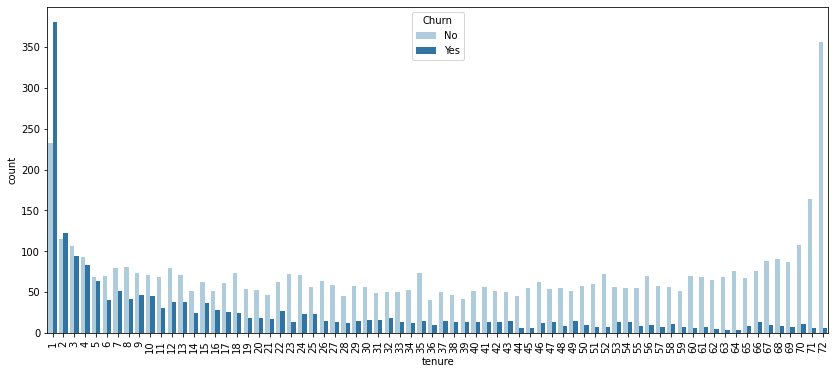

In [7]:
plt.figure(figsize=(14,6))

sns.countplot(data=df, x='tenure', hue='Churn', palette='Paired')

plt.xticks(rotation=90)
plt.show()

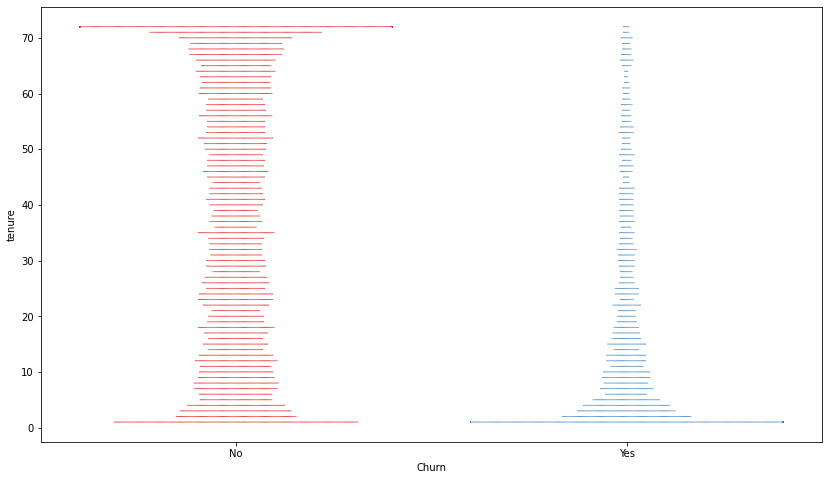

In [8]:
plt.figure(figsize=(14,8))

sns.swarmplot(data=df, x='Churn', y='tenure', size=1, palette='Set1');

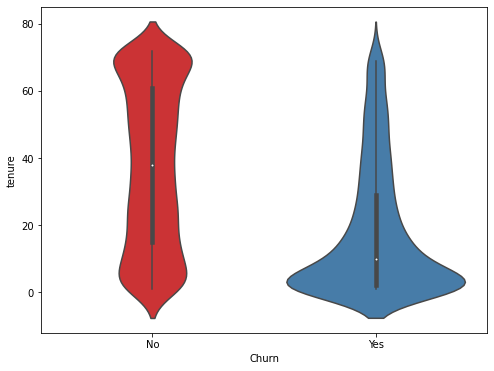

In [9]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df, x='Churn', y='tenure', palette='Set1');

Tenure and Churn are associated. Those who have stayed for one or few months are more likely to churn, while those who have stayed for many months are more likely to churn.

#### Contract

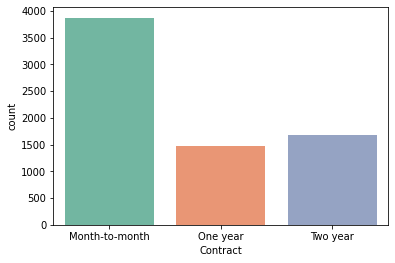

In [10]:
sns.countplot(data=df, x='Contract', palette='Set2');

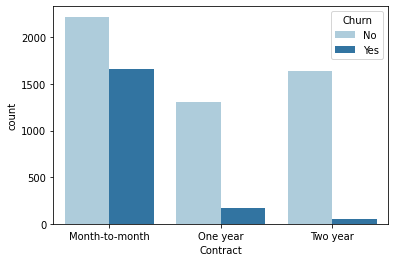

In [11]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Paired');

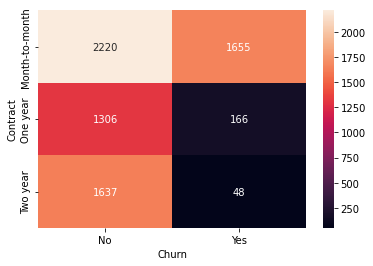

In [12]:
sns.heatmap(pd.crosstab(df['Contract'], df['Churn']), annot=True, fmt='g');

In [13]:
from scipy.stats import chi2_contingency

In [14]:
chi2_contingency(pd.crosstab(df['Contract'], df['Churn']))

(1179.5458287339445,
 7.326182186265472e-257,
 2,
 array([[2845.08319113, 1029.91680887],
        [1080.76450512,  391.23549488],
        [1237.15230375,  447.84769625]]))

Contract and Churn are strongly associated. The probability of churning is much higher for those with month-to-month contracts compared to those with one- or two-year contracts.

#### Monthly Charges

In [15]:
df['MonthlyCharges'].nunique()

1584

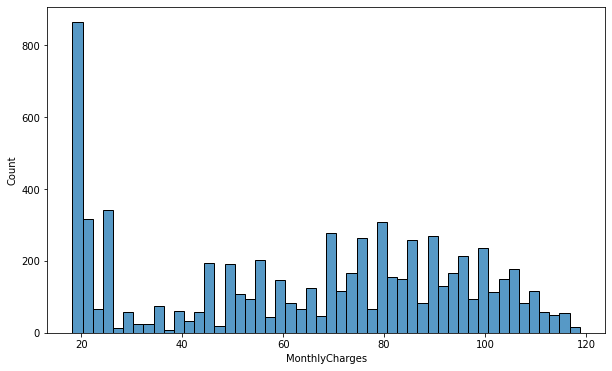

In [16]:
plt.figure(figsize=(10,6))

sns.histplot(data=df, x='MonthlyCharges', bins=50);

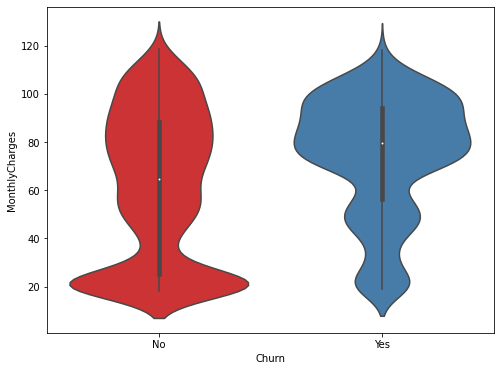

In [17]:
plt.figure(figsize=(8,6))

sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1');

Customers who have low monthly charges are more likely to stay, while customers who pay high monthly charges are more likely to churn.

#### Internet Service

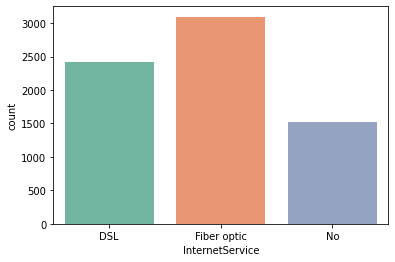

In [18]:
sns.countplot(data=df, x='InternetService', palette='Set2');

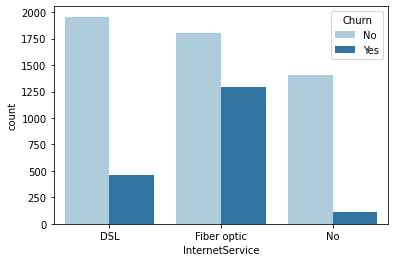

In [19]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Paired');

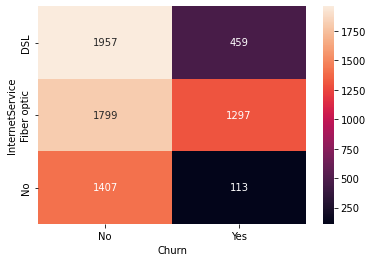

In [20]:
sns.heatmap(pd.crosstab(df['InternetService'], df['Churn']), annot=True, fmt='g');

In [21]:
chi2_contingency(pd.crosstab(df['InternetService'], df['Churn']))

(728.6956143058694,
 5.831198962237274e-159,
 2,
 array([[1773.86348123,  642.13651877],
        [2273.12969283,  822.87030717],
        [1116.00682594,  403.99317406]]))

Internet Service and Churn are highly associated. Those who use Fiber optic are more likely to churn than those who use DSL or those who don't use any internet service.

#### Payment method

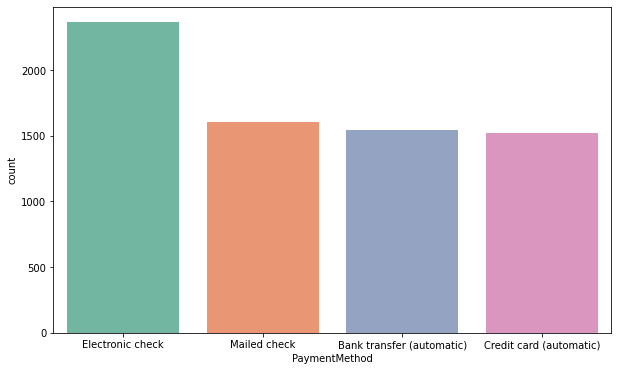

In [22]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='PaymentMethod', palette='Set2');

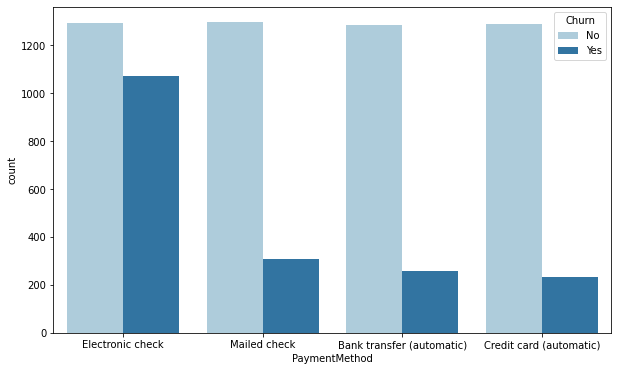

In [23]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Paired');

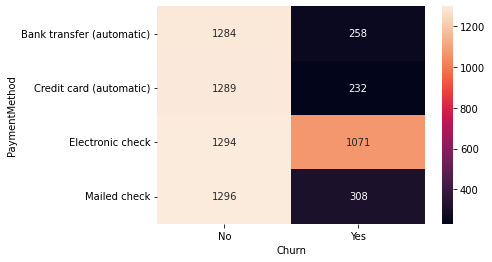

In [24]:
sns.heatmap(pd.crosstab(df['PaymentMethod'], df['Churn']), annot=True, fmt='g');

In [25]:
chi2_contingency(pd.crosstab(df['PaymentMethod'], df['Churn']))

(645.4299001234638,
 1.4263098511063342e-139,
 3,
 array([[1132.15955631,  409.84044369],
        [1116.74104096,  404.25895904],
        [1736.41851536,  628.58148464],
        [1177.68088737,  426.31911263]]))

Payment Method and Churn are associated. Those who pay via an electronic check are more likely to churn than those who pay in a different way.

#### Other features

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
other = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [28]:
for feature in other:
    p = chi2_contingency(pd.crosstab(df[feature], df['Churn']))[1]
    if p < 0.01:
        print('Churn, {}: p-value {}, associated'.format(feature, p))
    else:
        print('Churn, {}: p-value {}, NOT associated'.format(feature, p))

Churn, gender: p-value 0.4904884707065509, NOT associated
Churn, SeniorCitizen: p-value 2.4792557203954705e-36, associated
Churn, Partner: p-value 3.97379757451591e-36, associated
Churn, Dependents: p-value 2.0196592017051303e-42, associated
Churn, PhoneService: p-value 0.34992398942431924, NOT associated
Churn, MultipleLines: p-value 0.0035679273999811405, associated
Churn, InternetService: p-value 5.831198962237274e-159, associated
Churn, OnlineSecurity: p-value 1.4006867477839222e-184, associated
Churn, OnlineBackup: p-value 7.776099238804965e-131, associated
Churn, DeviceProtection: p-value 1.9593887862403176e-121, associated
Churn, TechSupport: p-value 7.407807748843711e-180, associated
Churn, StreamingTV: p-value 1.324641113169159e-81, associated
Churn, StreamingMovies: p-value 5.353560421401324e-82, associated
Churn, PaperlessBilling: p-value 8.236203353962564e-58, associated


In [29]:
(df['TotalCharges'] == df['MonthlyCharges']*df['tenure']).sum()/len(df)

0.0873151308304892

### 2. Building and validating a Logistic Regression model

In [30]:
X = pd.get_dummies(df.drop(['customerID', 'gender', 'PhoneService', 'TotalCharges', 'Churn'], 
                           axis=1), drop_first=True)
y = df['Churn']

Splitting the data into training and test set.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=124)

In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4922, 2110, 4922, 2110)

Standardising the data.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X_train = scaler.fit_transform(X_train)

In [37]:
scaled_X_test = scaler.transform(X_test)

Fitting a logistic regression model.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_model = LogisticRegression()

In [40]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

Evaluating the model.

In [41]:
y_pred = log_model.predict(scaled_X_test)

In [70]:
from sklearn.metrics import plot_confusion_matrix, classification_report 
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

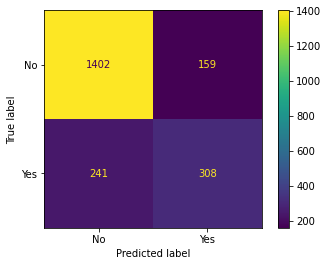

In [43]:
plot_confusion_matrix(log_model, scaled_X_test, y_test);

In [71]:
tp = 308
tn = 1402
fp = 159
fn = 241

In [72]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.8104265402843602

In [73]:
prec_yes = tp/(tp+fp)
prec_yes

0.6595289079229122

In [74]:
prec_no = tn/(tn+fn)
prec_no

0.8533171028606208

In [75]:
recall_yes = tp/(tp+fn)
recall_yes

0.5610200364298725

In [76]:
recall_no = tn/(tn+fp)
recall_no

0.8981422165278667

In [77]:
f1_yes = 2*prec_yes*recall_yes/(prec_yes+recall_yes)
f1_yes

0.6062992125984251

In [78]:
f1_no = 2*prec_no*recall_no/(prec_no+recall_no)
f1_no

0.8751560549313357

In [79]:
len(y_test)

2110

In [80]:
n_yes = (y_test == 'Yes').sum()
n_yes

549

In [81]:
n_no = (y_test == 'No').sum()
n_no

1561

In [82]:
w_yes = n_yes/(n_yes+n_no)
w_yes

0.26018957345971566

In [83]:
w_no = n_no/(n_yes+n_no)
w_no

0.7398104265402844

In [84]:
prec_yes*0.5+prec_no*0.5, prec_yes*w_yes+prec_no*w_no

(0.7564230053917664, 0.8028954350782502)

In [85]:
recall_yes*0.5+recall_no*0.5, recall_yes*w_yes+recall_no*w_no

(0.7295811264788696, 0.8104265402843602)

In [86]:
f1_yes*0.5+f1_no*0.5, f1_yes*w_yes+f1_no*w_no

(0.7407276337648805, 0.8052023078030097)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1561
         Yes       0.66      0.56      0.61       549

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



In [88]:
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tpr, fpr

(0.5610200364298725, 0.10185778347213324)

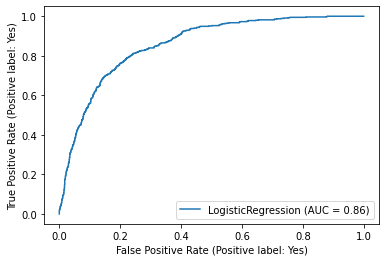

In [89]:
plot_roc_curve(log_model, scaled_X_test, y_test);

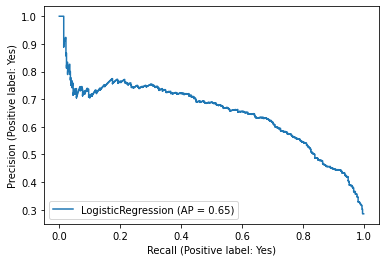

In [90]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test);

In [91]:
len(X.columns), len(log_model.coef_[0])

(27, 27)

In [92]:
coef = pd.DataFrame(data=log_model.coef_[0], index=X.columns, columns=['coefficient']).sort_values('coefficient')

In [93]:
coef

,coefficient
tenure,-0.869144
Contract_Two year,-0.500739
MonthlyCharges,-0.345805
Contract_One year,-0.228400
OnlineSecurity_Yes,-0.162396
TechSupport_Yes,-0.131838
Dependents_Yes,-0.083200
StreamingMovies_No internet service,-0.069644
InternetService_No,-0.069644
OnlineSecurity_No internet service,-0.069644


### 3. Tree-based methods